Задание.

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

Требуется выполнить следующее задание:
1. Загрузите файл HR.csv в pandas dataframe
2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждом
департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким
окладом
8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов
9. Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки
10. Загрузить jupyter notebook с решением на github и прислать ссылку

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR.csv to HR.csv


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Рассчитаем основные статистики для переменных.

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.agg(pd.Series.mode)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Рассчитаем и визуализируем корреляционную матрицу для
количественных переменных.
Определим две самые скоррелированные и две наименее
скоррелированные переменные.

In [ ]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

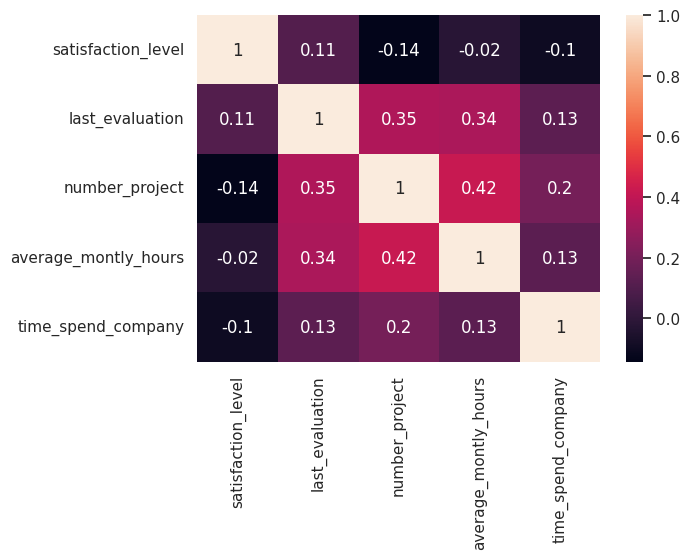

In [ ]:
sns.set(rc={'figure.figsize':(6.5, 4.5)})
sns.heatmap(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr(), annot=True)

Наиболее кореллирующими показателями являются number_project и average_monthly_hours (r=0.42), а также last_evaluation и number_project (r=0.35:). Исходя из коэффициента Пирсона, можно сделать вывод, что в обоих случаях связь слабая положительная.

Наименее кореллирующими показателями являются satisfaction_level и average_monthly_hours (r=-0.02), а также satisfaction_level и time_spend_company (r=-0.1:). Исходя из коэффициента Пирсона, можно сделать вывод, что в обоих случаях связь практически отсутствует или очень слабая.

Посмотрим на количество работающих сотрудников в каждом департаменте.


In [ ]:
df.query('left == 0').groupby(['department']).size().sort_values(ascending=False)

department
sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
dtype: int64

Наибольшее количество сотрудников работает в отделе продаж, а наименьшее - в отделе по подбору персонала.

Посмотрим на распределение сотрудников по зарплатам.

(array([7316.,    0.,    0.,    0.,    0., 6446.,    0.,    0.,    0.,
        1237.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

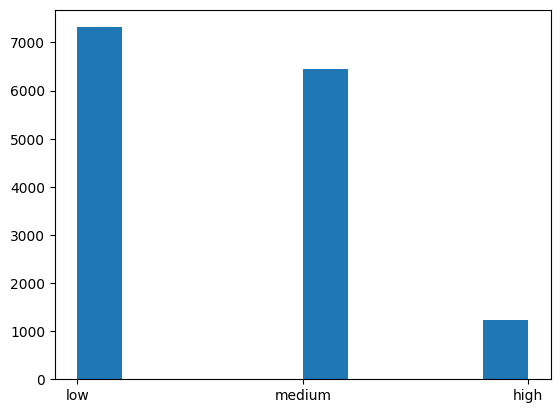

In [ ]:
plt.hist(df['salary'])

На гистограмме видно, что большая часть сотрудников получает низкую зарплату, а высокую зарплату получает лишь маленькая доля сотрудников.

Посмотрим на распределение зарплат по департаментам.

<Axes: xlabel='department'>

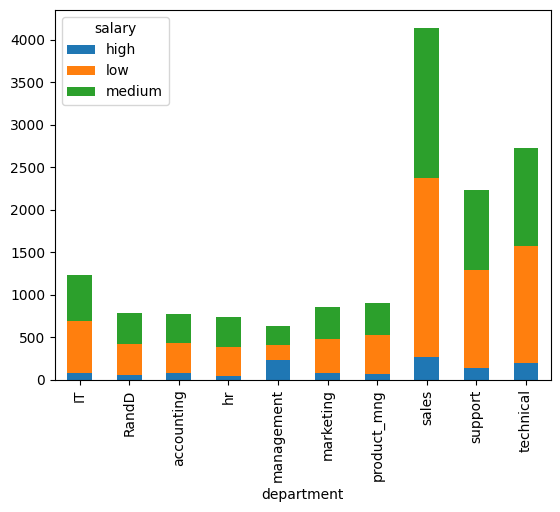

In [ ]:
df.groupby(['department', 'salary']).size().unstack().plot(kind='bar', stacked=True)

На диаграмме видно, что наибольшая доля высоких зарплат приходится на отдел менеджмент, в остальных отделах в среднем преобладают низкие зарплаты.

In [ ]:
grouped = df.groupby(['salary', 'department'])['satisfaction_level'].count().reset_index()
grouped.rename(columns = {'satisfaction_level': 'count'}, inplace = True)
grouped.head()

,salary,department,count
0,high,IT,83
1,high,RandD,51
2,high,accounting,74
3,high,hr,45
4,high,management,225


In [ ]:
grouped['share'] = 100 * grouped['count'] / grouped.groupby('department')['count'].transform('sum')
grouped.sort_values(by=['department', 'salary'], ascending=True)

,salary,department,count,share
0,high,IT,83,6.764466
10,low,IT,609,49.633252
20,medium,IT,535,43.602282
1,high,RandD,51,6.480305
11,low,RandD,364,46.251588
21,medium,RandD,372,47.268107
2,high,accounting,74,9.647979
12,low,accounting,358,46.675359
22,medium,accounting,335,43.676662
3,high,hr,45,6.089310


Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
high_salary_group = df.loc[df['salary'] == 'high']
high_salary_group

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high
267,0.45,0.53,2,129,3,0,1,0,technical,high
306,0.37,0.46,2,149,3,0,1,0,marketing,high
...,...,...,...,...,...,...,...,...,...,...
14829,0.45,0.57,2,148,3,0,1,0,marketing,high
14868,0.43,0.55,2,130,3,0,1,0,support,high
14902,0.45,0.46,2,159,3,0,1,0,hr,high
14941,0.43,0.49,2,131,3,0,1,0,RandD,high


In [ ]:
low_salary_group = df.loc[df['salary'] == 'low']
low_salary_group

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
high_salary_group['average_montly_hours'].std()

47.710445562322214

In [ ]:
low_salary_group['average_montly_hours'].std()

50.83221420147713

Так дисперсии не равны, используем критерий Уэлча.

In [ ]:
#H0 - сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
#H1 - сотрудники с высоким окладом не проводят на работе больше времени, чем сотрудники с низким окладом
stat, p = stats.ttest_ind(high_salary_group['average_montly_hours'], low_salary_group['average_montly_hours'], equal_var=False, alternative='less')

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, сотрудники с высоким окладом, вероятно, проводят на работе больше времени, чем сотрудники с низким окладом')
else:
    print('Отклоняем нулевую гипотезу, сотрудники с высоким окладом, вероятно, не проводят на работе больше времени, чем сотрудники с низким окладом')

Статистика = -0.76243, p = 0.2229522771
Не отклоняем нулевую гипотезу, сотрудники с высоким окладом, вероятно, проводят на работе больше времени, чем сотрудники с низким окладом


Рассчитаем следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [ ]:
left_employee_group = df.loc[df['left'] == 1]
left_employee_group

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
working_employee_group = df.loc[df['left'] == 0]
working_employee_group

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [ ]:
promotion = left_employee_group.groupby('promotion_last_5years')['left'].count().reset_index()
promotion.rename(columns = {'left': 'count'}, inplace = True)
promotion

,promotion_last_5years,count
0,0,3552
1,1,19


In [ ]:
promotion['share'] = round(100 * promotion['count'] / promotion['count'].sum(), 2)
promotion

,promotion_last_5years,count,share
0,0,3552,99.47
1,1,19,0.53


Доля сотрудников с повышением за последние 5 лет среди уволившихся равна 0.53%.

In [ ]:
promotion = working_employee_group.groupby('promotion_last_5years')['left'].count().reset_index()
promotion.rename(columns = {'left': 'count'}, inplace = True)
promotion

,promotion_last_5years,count
0,0,11128
1,1,300


In [ ]:
promotion['share'] = round(100 * promotion['count'] / promotion['count'].sum(), 2)
promotion

,promotion_last_5years,count,share
0,0,11128,97.37
1,1,300,2.63


Доля сотрудников с повышением за последние 5 лет среди неуволившихся равна 2.63%.

In [ ]:
left_employee_group['satisfaction_level'].mean()

0.4400980117614114

In [ ]:
working_employee_group['satisfaction_level'].mean()

0.666809590479524

In [ ]:
diff = round((working_employee_group['satisfaction_level'].mean() / left_employee_group['satisfaction_level'].mean() - 1) * 100, 1)
print(f'Средняя степень удовлетворенности среди неуволившихся сотрдутников выше, чем у уволившихся на {diff}%.')

Средняя степень удовлетворенности среди неуволившихся сотрдутников выше, чем у уволившихся на 51.5%.


In [ ]:
left_employee_group['number_project'].mean()

3.8555026603192384

In [ ]:
working_employee_group['number_project'].mean()

3.786664333216661

Среднее количество проектов у обех групп сотрудников равны - по 3 полных проекта.

Построим модель LDA, предсказывающую уволился ли сотрудник, и оценим ее качество.

In [ ]:
from sklearn. model_selection import train_test_split

In [ ]:
data = df.iloc[:, [0,1,2,3,4,5,7]]
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, df['left'], random_state=42)

In [ ]:
len(y_test)

3750

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test = y_test.reset_index()['left']
y_test

0       0
1       0
2       0
3       1
4       0
       ..
3745    0
3746    1
3747    0
3748    0
3749    0
Name: left, Length: 3750, dtype: int64

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.rename(columns = {'left': 'actual', 'Unnamed 0': 'predict'}, inplace = True )
result

,actual,predict
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,1


In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.58366087e+00,  6.57019075e-01, -2.18430857e-01,
         4.47682750e-03,  2.22165799e-01, -1.04525663e+00,
        -1.10730495e+00]])

Исходя из коэффициентов дискриминатных линий, можно сделать вывод, что наибольшее влияние на определение класса имеют признаки satisfaction_level,last_evaluation, average_montly_hours.

In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

0.7536

Данная метрика в нашем случае не подходит, так как классы несбалансированы.

Для оценки качества модели на каждом из классов по отдельности рассчитаем метрики precision и recall, а также F-меру, которая является средней между precision и recall.

In [ ]:
from sklearn. metrics import classification_report

In [ ]:
report = classification_report(y_test, lda.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2853
           1       0.47      0.25      0.32       897

    accuracy                           0.75      3750
   macro avg       0.63      0.58      0.59      3750
weighted avg       0.72      0.75      0.72      3750



Для сравнения оценки качества модели построим матрицу путаницы.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = lda.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2605,  248],
       [ 676,  221]])

Из матрицы путаницы мы видим, что:

- Истинно положительных предсказаний: 2605
- Истинно отрицательные прогнозы: 221
- Ложноположительные прогнозы: 676
- Ложноотрицательные прогнозы: 248

In [ ]:
precision = 2605/(2605+676)
precision

0.7939652544955806

In [ ]:
recall = 2605/(2605+248)
recall

0.9130739572379951

In [ ]:
f1_matrix = round(2 * (precision * recall) / (precision + recall), 2)
f1_matrix

0.85

In [ ]:
f1_report = 0.72

In [ ]:
diff = round((f1_matrix / f1_report - 1) * 100, 1)
diff

18.1

In [ ]:
print(f'Значение F1-score при построении матрицы путаницы больше, чем при построении отчета о классификации на {diff}%.')

Значение f1-score при построении матрицы путаницы больше, чем при построении отчета о классификации на 18.1%.


Значение F1-score (0.85) довольно близко к 1, поэтому модель можно считать полезной для прогнозирования увольнения сотрудников.